*Import Libraries*

In [2]:
from tensorflow import keras      # print(keras.__version__, tf.__version__)
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, preprocessing

*Step 1. Load data*<br/>
[Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)

In [3]:
data = datasets.fetch_california_housing()
print(f"Data.keys: {data.keys()}")                                      # Information about dataset
print(f"\n Inputs:{data['data']}")                                      # Input data
print(f"\n Labels:{data['target']}")                                    # Targets or Labels
print(f"\n Target_names:{data['feature_names']}")                       # Features name

Data.keys: dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

 Inputs:[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]

 Labels:[4.526 3.585 3.521 ... 0.923 0.847 0.894]

 Target_names:['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
input_data = data['data']                                         # Input data
labels_data = data['target']                                      # Targets or Labels
print(f"input_data.shape: {input_data.shape}")
print(f"labels.shape: {labels_data.shape}")

input_data.shape: (20640, 8)
labels.shape: (20640,)


*Step 2: [Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)*<br/>
Split dataset into random train and test subsets<br/>
Split train into random train and validation subsets<br/>

In [5]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(input_data, labels_data, test_size=0.25)  # Split data into train & test
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x_train, y_train, test_size=0.25) # Split train into train & validation
print(f"x_train.shape:{x_train.shape}")
print(f"x_test.shape:{x_test.shape}")
print(f"x_validation.shape:{x_validation.shape}")
print(f"y_train.shape:{y_train.shape}")
print(f"y_test.shape:{y_test.shape}")
print(f"y_validation.shape:{y_validation.shape}")

x_train.shape:(11610, 8)
x_test.shape:(5160, 8)
x_validation.shape:(3870, 8)
y_train.shape:(11610,)
y_test.shape:(5160,)
y_validation.shape:(3870,)


*Step 3: [Normalize data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)*


In [6]:
norm = preprocessing.StandardScaler()
x_train_norm = norm.fit_transform(x_train)
x_validation_norm = norm.transform(x_validation)
x_test_norm = norm.transform(x_test)

*Step 4: [Wide & Deep Network](https://keras.io/api/models/model/#model-class)*<br/>
[Functional API](https://keras.io/guides/functional_api/)<br/>
[Concatenate layer](https://keras.io/api/layers/merging_layers/concatenate/)<br/>
[Article](https://arxiv.org/pdf/1606.07792.pdf)<br/>
Method 1: Single input single output (SISO)

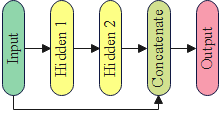

In [48]:
# --------------------------------------------------- Build the model --------------------------------------------------
input_ = keras.layers.Input(shape=x_train.shape[1:])               # Single input single output (SISO); Shape: Number of column
hidden_layer1 = keras.layers.Dense(50, activation="relu")(input_)
hidden_layer2 = keras.layers.Dense(10, activation="relu")(hidden_layer1)
concatenate_layer = keras.layers.Concatenate()([input_, hidden_layer2])
output = keras.layers.Dense(1)(concatenate_layer)
model = keras.Model(inputs=[input_], outputs=[output])

*Step 5. Compile Model*

In [49]:
model.compile(loss="mse", optimizer="sgd", metrics=["mae"])

*Step 6. [Callbacks API](https://keras.io/api/callbacks/)*<br/>
[Link](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback)

In [50]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath="model_SISO.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [51]:
class mycallback(keras.callbacks.Callback):
    def on_train_end(self, logs=None):
        print()
    def on_epoch_end(self, epoch, logs):
        print(logs["val_loss"])

In [52]:
tensor_board = keras.callbacks.TensorBoard("tb_log")

*Step 6: Fit, evaluate & predict Model*


In [53]:
history = model.fit(x_train_norm, y_train, epochs=30, validation_data=(x_validation_norm, y_validation), callbacks=[checkpoint, 
                                                                       early_stopping, mycallback(), tensor_board])
history.params
history.history
model.summary()
weights, bias = model.layers[1].get_weights()

Epoch 1/30
363/363 [==============================] - 4s 7ms/step - loss: 0.7171 - mae: 0.5907 - val_loss: 3.5574 - val_mae: 0.5398
Epoch 2/30
 23/363 [>.............................] - ETA: 1s - loss: 0.5001 - mae: 0.5024

c:\Users\Reza\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 2s 6ms/step - loss: 0.4326 - mae: 0.4666 - val_loss: 0.6936 - val_mae: 0.4679
Epoch 3/30
363/363 [==============================] - 2s 5ms/step - loss: 0.6072 - mae: 0.4682 - val_loss: 0.4317 - val_mae: 0.4429
Epoch 4/30
363/363 [==============================] - 2s 6ms/step - loss: 0.4053 - mae: 0.4405 - val_loss: 0.7271 - val_mae: 0.4436
Epoch 5/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3720 - mae: 0.4289 - val_loss: 0.3595 - val_mae: 0.4194
Epoch 6/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3588 - mae: 0.4216 - val_loss: 0.8516 - val_mae: 0.4324
Epoch 7/30
363/363 [==============================] - 2s 7ms/step - loss: 0.3558 - mae: 0.4183 - val_loss: 2.1741 - val_mae: 0.4369
Epoch 8/30
363/363 [==============================] - 4s 10ms/step - loss: 0.3554 - mae: 0.4173 - val_loss: 1.1869 - val_mae: 0.4345
Epoch 9/30
363/363 [==============================] - 2s 6ms/step - loss: 0.3523 - mae

*Plot*

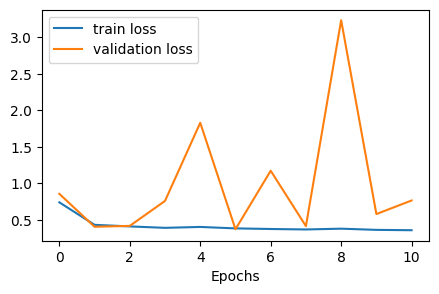

In [44]:
fig, axs = plt.subplots(figsize=(5, 3))
axs.plot(history.history["loss"], label="train loss")
axs.plot(history.history["val_loss"], label="validation loss")
axs.set_xlabel("Epochs")
axs.legend()

In [55]:
%load_ext tensorboard
%tensorboard --logdir=./tb_log 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
